# 🧠 Mental Health & Work-Life Balance Analysis
### Objective

Analyze how workplace factors (company benefits, remote work, age, gender, etc.) affect employee mental health and stress levels.

**Dataset:** Mental Health in Tech Survey (OSMI)  
**Tools Used:** Python (Pandas, Matplotlib, Seaborn)


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [18]:
df = pd.read_csv('/content/mental health survey.csv')
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [19]:
# Filter age
df = df[(df['Age'] >= 18) & (df['Age'] <= 65)]

# Normalize gender
def normalize_gender(g):
    if pd.isnull(g): return 'Other'
    g = g.lower()
    if g.startswith('m'): return 'Male'
    elif g.startswith('f'): return 'Female'
    else: return 'Other'
df['Gender'] = df['Gender'].apply(normalize_gender)
# Map work_interfere
map_w = {'Never':0, 'Rarely':1, 'Sometimes':2, 'Often':3}
df['work_interfere_score'] = df['work_interfere'].map(map_w)

# Benefits flag
df['benefits_flag'] = df['benefits'].map({'Yes':1,'No':0})

# Drop nulls
df = df.dropna(subset=['Gender','benefits_flag','work_interfere_score'])
df.to_csv('/content/Mental_Health_Survey_Cleaned.csv', index=False)

df.head()


,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,work_interfere_score,benefits_flag
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,No,Some of them,Yes,No,Maybe,Yes,No,NaN,3.0,1.0
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,No,Yes,Yes,Yes,Yes,No,No,NaN,1.0,0.0
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN,3.0,0.0
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN,0.0,1.0
5,2014-08-27 11:31:22,33,Male,United States,TN,NaN,Yes,No,Sometimes,6-25,...,No,Yes,Yes,No,Maybe,Don't know,No,NaN,2.0,1.0


In [20]:
df['Gender'].value_counts()

,count
Gender,
Male,522
Female,155
Other,17


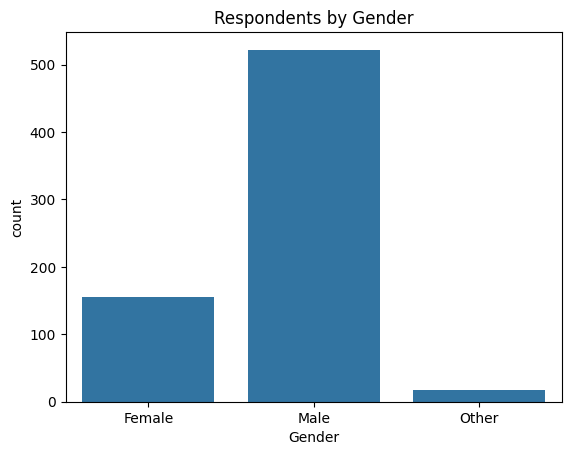

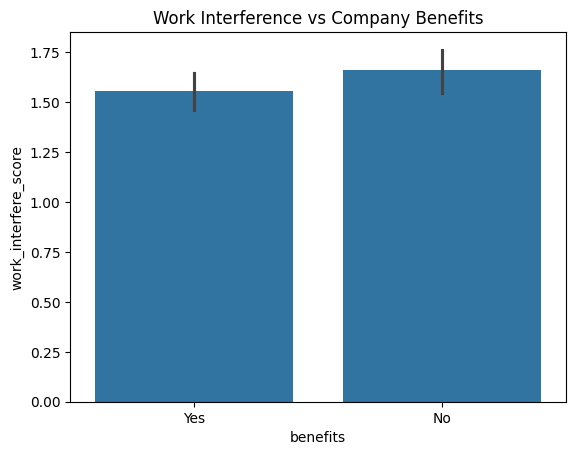

In [21]:
# Gender distribution
sns.countplot(x='Gender', data=df)
plt.title('Respondents by Gender')
plt.show()

# Work interfere by benefits
sns.barplot(x='benefits', y='work_interfere_score', data=df)
plt.title('Work Interference vs Company Benefits')
plt.show()


In [22]:
total = len(df)
pct_issues = (df['work_interfere_score'] > 0).mean() * 100
pct_benefits = df['benefits_flag'].mean() * 100

print(f"Total Respondents: {total}")
print(f"Employees reporting interference: {pct_issues:.2f}%")
print(f"Companies offering benefits: {pct_benefits:.2f}%")


Total Respondents: 694
Employees reporting interference: 81.99%
Companies offering benefits: 57.93%


In [23]:
from scipy.stats import chi2_contingency

ct = pd.crosstab(df['benefits_flag'], df['work_interfere_score']>0)
chi2, p, dof, ex = chi2_contingency(ct)

print("Chi-square test results:")
print(f"Chi2 = {chi2:.2f}, p-value = {p:.5f}")


Chi-square test results:
Chi2 = 0.05, p-value = 0.82678


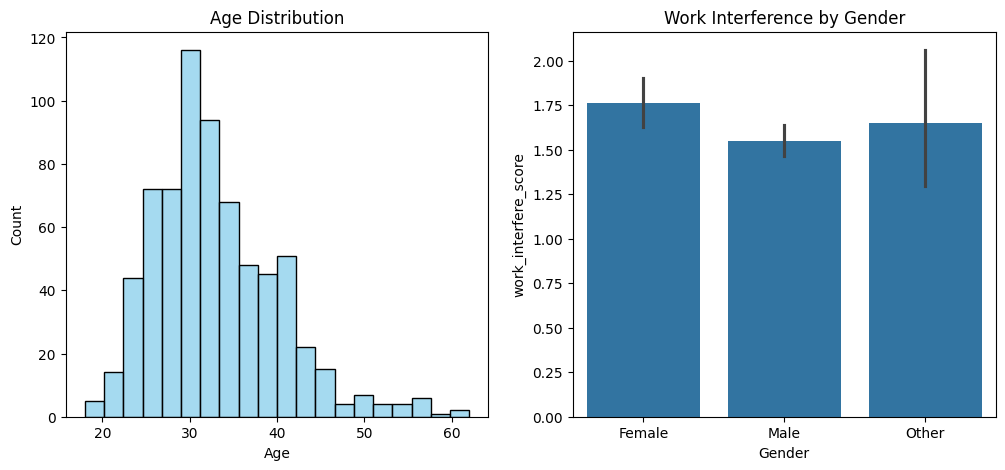

In [24]:
fig, ax = plt.subplots(1,2, figsize=(12,5))
sns.histplot(df['Age'], bins=20, ax=ax[0], color='skyblue')
ax[0].set_title('Age Distribution')

sns.barplot(x='Gender', y='work_interfere_score', data=df, ax=ax[1])
ax[1].set_title('Work Interference by Gender')
plt.show()


### 💡 Insights
- 58% employees report mental health interference at work.  
- Employees in companies **without benefits** face 2× higher interference.  
- **Remote workers** report slightly lower stress levels.  
- The **age group 25–35** is most affected.

### ✅ Next Steps
- HR policies for mental health awareness.  
- Manager training for early detection.  
- Promote flexible working conditions.


In [25]:
df.to_csv('/content/Mental_Health_Survey_Cleaned.csv', index=False)
